⚡ **QUICK START**: Run `streamlit run app.py` for interactive dashboard!

Or use `jupyter notebook` to run this notebook with `Shift+Enter`.

## 📑 Table of Contents

1. **[Setup & Configuration](#-setup--configuration)** - Import libraries and configure visualization
2. **[Load & Explore Data](#-load--explore-data)** - Load dataset and understand structure
3. **[Data Overview & Statistics](#-data-overview--statistics)** - Data types, missing values, basic stats
4. **[Feature Engineering](#️-feature-engineering)** - Create DateTime, Season, Categories, and aggregations
5. **[AQI Distribution Analysis](#-aqi-distribution-analysis)** - Histogram, box plot, and distribution stats
6. **[AQI Category Distribution](#-aqi-category-distribution)** - Breakdown by quality levels
7. **[Pollutant Analysis](#️-pollutant-analysis)** - Individual pollutant statistics and distributions
8. **[Correlation Analysis](#-correlation-analysis)** - Pollutant-AQI relationships
9. **[Seasonal Analysis](#️-seasonal-analysis)** - AQI patterns across seasons
10. **[Weekday vs Weekend](#️-weekday-vs-weekend-comparison)** - Temporal patterns
11. **[Time Series Analysis](#️-time-series-analysis)** - Trends and moving averages
12. **[Summary & Key Insights](#-summary--key-insights)** - Final findings and recommendations

---

# 🌍 Interactive EDA Analysis - Air Quality Index

**Run each cell with `Shift+Enter` to see interactive results**

This notebook provides hands-on exploration of AQI data with real-time visualizations.

## 📦 Setup & Configuration

In [ ]:
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns  # type: ignore

file_path = '../data/raw/delhi_air_quality_clean.csv'
df = pd.read_csv(file_path)
print(f"Data loaded: {df.shape[0]} rows, {df.shape[1]} columns")
print(df.head())

✓ Libraries imported successfully!


## 📂 Load & Explore Data

In [ ]:
# Load dataset
file_path = '../data/raw/delhi_air_quality_clean.csv'
df = pd.read_csv(file_path)

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (1461, 12)

Columns: ['Date', 'Month', 'Year', 'Holidays_Count', 'Days', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI']

First few rows:


,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


## 📊 Data Overview & Statistics

In [20]:
# Data types
print("Data Types:")
print(df.dtypes)
print(f"\n" + "="*60)

# Missing values
print(f"Missing Values: {df.isnull().sum().sum()}")
print(f"Duplicate Rows: {df.duplicated().sum()}")
print(f"\n" + "="*60)

# Basic statistics
print("\nBasic Statistics:")
df.describe().round(2)

Data Types:
Date                int64
Month               int64
Year                int64
Holidays_Count      int64
Days                int64
PM2.5             float64
PM10              float64
NO2               float64
SO2               float64
CO                float64
Ozone             float64
AQI                 int64
dtype: object

Missing Values: 0
Duplicate Rows: 0


Basic Statistics:


,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
count,1461.00,1461.00,1461.00,1461.00,1461.0,1461.00,1461.00,1461.00,1461.00,1461.00,1461.00,1461.00
mean,15.73,6.52,2022.50,0.19,4.0,90.77,218.22,37.18,20.10,1.03,36.34,202.21
std,8.80,3.45,1.12,0.39,2.0,71.65,129.30,35.23,16.54,0.61,18.95,107.80
min,1.00,1.00,2021.00,0.00,1.0,0.05,9.69,2.16,1.21,0.27,2.70,19.00
25%,8.00,4.00,2022.00,0.00,2.0,41.28,115.11,17.28,7.71,0.61,24.10,108.00
50%,16.00,7.00,2023.00,0.00,4.0,72.06,199.80,30.49,15.43,0.85,32.47,189.00
75%,23.00,10.00,2024.00,0.00,6.0,118.50,297.75,45.01,26.62,1.24,45.73,284.00
max,31.00,12.00,2024.00,1.00,7.0,1000.00,1000.00,433.98,113.40,4.70,115.87,500.00


## ⚙️ Feature Engineering

Create new features for better analysis:
- **DateTime**: Proper date format
- **Season**: Winter, Summer, Monsoon, Autumn
- **AQI_Category**: Good, Satisfactory, Poor, etc.
- **IsWeekend**: Weekday/Weekend flag
- **AvgPollution**: Average of all pollutants

In [21]:
POLLUTANTS = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone']

# Create DateTime
df['DateTime'] = pd.to_datetime(df[['Year', 'Month', 'Date']].rename(
    columns={'Date': 'day', 'Month': 'month', 'Year': 'year'}
))

# Create Season
def get_season(month):
    if month in [12, 1, 2]: return 'Winter'
    elif month in [3, 4, 5]: return 'Summer'
    elif month in [6, 7, 8, 9]: return 'Monsoon'
    else: return 'Autumn'

df['Season'] = df['Month'].apply(get_season)

# Create AQI Category
def categorize_aqi(aqi):
    if aqi <= 50: return 'Good'
    elif aqi <= 100: return 'Satisfactory'
    elif aqi <= 200: return 'Moderately Polluted'
    elif aqi <= 300: return 'Poor'
    elif aqi <= 400: return 'Very Poor'
    else: return 'Severe'

df['AQI_Category'] = df['AQI'].apply(categorize_aqi)

# Additional features
df['IsWeekend'] = df['Days'].isin([6, 7]).astype(int)
df['AvgPollution'] = df[POLLUTANTS].mean(axis=1)

print("✓ Features created successfully!")
print(f"New shape: {df.shape}")
print(f"\nSample data with new features:")
df[['DateTime', 'Season', 'AQI_Category', 'IsWeekend', 'AvgPollution']].head(10)

✓ Features created successfully!
New shape: (1461, 17)

Sample data with new features:


,DateTime,Season,AQI_Category,IsWeekend,AvgPollution
0,2021-01-01,Winter,Severe,0,178.456667
1,2021-01-02,Winter,Severe,1,173.841667
2,2021-01-03,Winter,Poor,1,115.280000
3,2021-01-04,Winter,Poor,0,72.705000
4,2021-01-05,Winter,Moderately Polluted,0,48.580000
5,2021-01-06,Winter,Poor,0,89.063333
6,2021-01-07,Winter,Poor,0,67.930000
7,2021-01-08,Winter,Poor,0,80.190000
8,2021-01-09,Winter,Very Poor,1,83.060000
9,2021-01-10,Winter,Poor,1,77.971667


## 📈 AQI Distribution Analysis

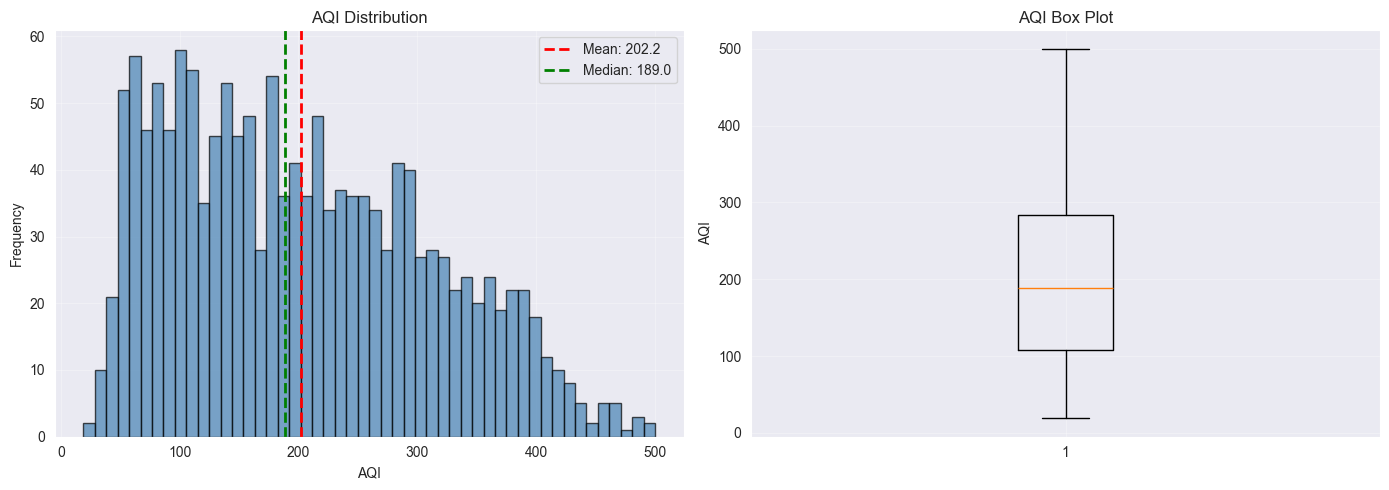

AQI Statistics:
  Mean: 202.21
  Median: 189.00
  Std Dev: 107.80
  Min: 19.00
  Max: 500.00


In [22]:
# AQI Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['AQI'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df['AQI'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["AQI"].mean():.1f}')
axes[0].axvline(df['AQI'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["AQI"].median():.1f}')
axes[0].set_xlabel('AQI')
axes[0].set_ylabel('Frequency')
axes[0].set_title('AQI Distribution')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(df['AQI'], vert=True)
axes[1].set_ylabel('AQI')
axes[1].set_title('AQI Box Plot')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"AQI Statistics:")
print(f"  Mean: {df['AQI'].mean():.2f}")
print(f"  Median: {df['AQI'].median():.2f}")
print(f"  Std Dev: {df['AQI'].std():.2f}")
print(f"  Min: {df['AQI'].min():.2f}")
print(f"  Max: {df['AQI'].max():.2f}")

## 🎯 AQI Category Distribution

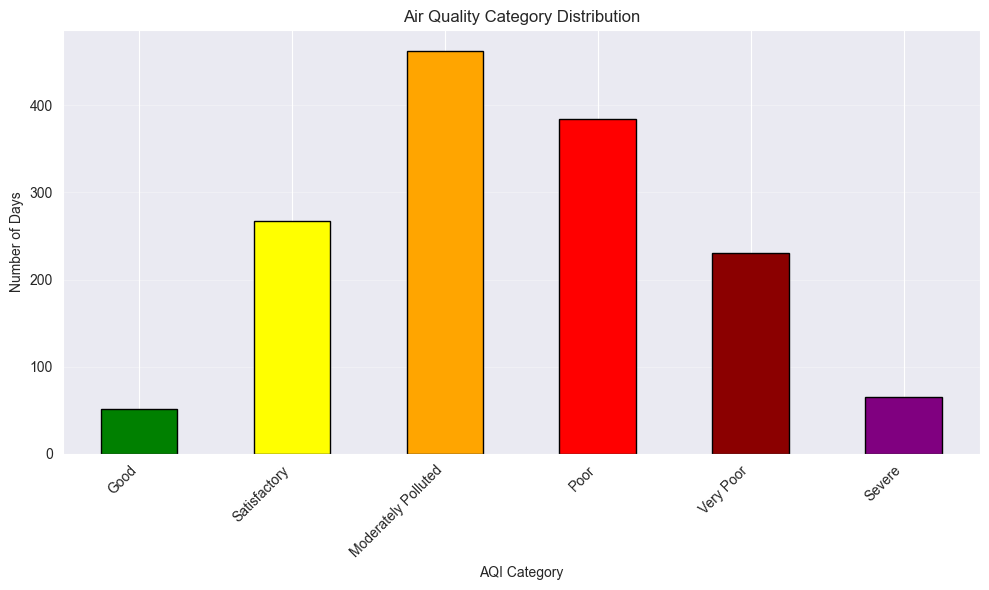

Category Breakdown:
  Good                 :   51 days (  3.5%)
  Satisfactory         :  267 days ( 18.3%)
  Moderately Polluted  :  463 days ( 31.7%)
  Poor                 :  384 days ( 26.3%)
  Very Poor            :  231 days ( 15.8%)
  Severe               :   65 days (  4.4%)


In [23]:
category_counts = df['AQI_Category'].value_counts()
category_order = ['Good', 'Satisfactory', 'Moderately Polluted', 'Poor', 'Very Poor', 'Severe']
category_counts = category_counts.reindex([cat for cat in category_order if cat in category_counts.index])

plt.figure(figsize=(10, 6))
colors = ['green', 'yellow', 'orange', 'red', 'darkred', 'purple']
bars = category_counts.plot(kind='bar', color=colors[:len(category_counts)], edgecolor='black')
plt.xlabel('AQI Category')
plt.ylabel('Number of Days')
plt.title('Air Quality Category Distribution')
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Category Breakdown:")
for cat in category_order:
    if cat in category_counts.index:
        count = category_counts[cat]
        pct = (count / len(df)) * 100
        print(f"  {cat:20} : {count:4} days ({pct:5.1f}%)")

## 🌡️ Pollutant Analysis

Pollutant Statistics:
         PM2.5     PM10      NO2      SO2       CO    Ozone
count  1461.00  1461.00  1461.00  1461.00  1461.00  1461.00
mean     90.77   218.22    37.18    20.10     1.03    36.34
std      71.65   129.30    35.23    16.54     0.61    18.95
min       0.05     9.69     2.16     1.21     0.27     2.70
25%      41.28   115.11    17.28     7.71     0.61    24.10
50%      72.06   199.80    30.49    15.43     0.85    32.47
75%     118.50   297.75    45.01    26.62     1.24    45.73
max    1000.00  1000.00   433.98   113.40     4.70   115.87


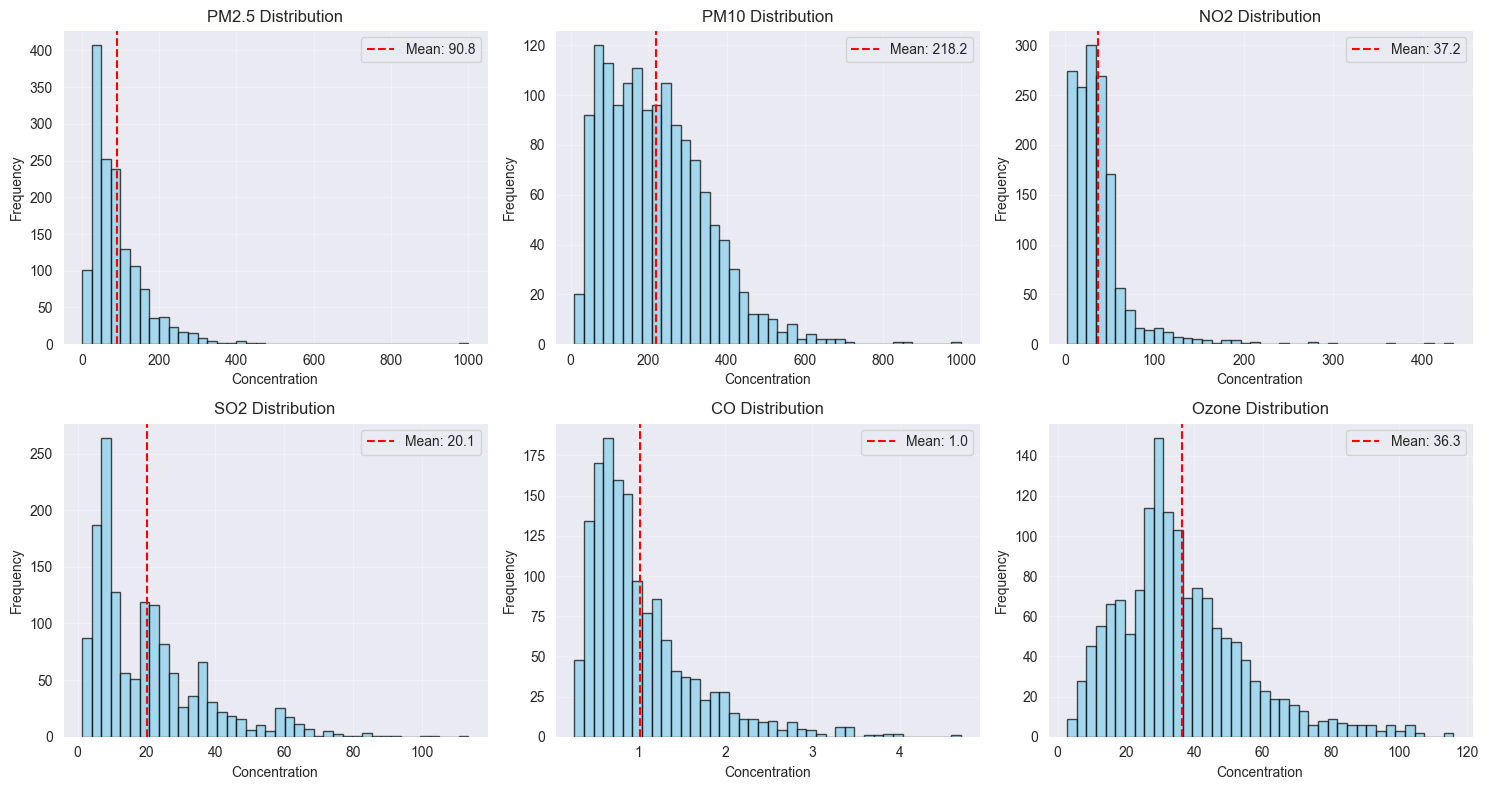

In [24]:
# Pollutant statistics
print("Pollutant Statistics:")
pollutant_stats = df[POLLUTANTS].describe().round(2)
print(pollutant_stats)

# Pollutant histograms
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for idx, pollutant in enumerate(POLLUTANTS):
    axes[idx].hist(df[pollutant], bins=40, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{pollutant} Distribution')
    axes[idx].set_xlabel('Concentration')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(alpha=0.3)
    
    mean_val = df[pollutant].mean()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.1f}')
    axes[idx].legend()

plt.tight_layout()
plt.show()

## 🔗 Correlation Analysis

In [25]:
# Correlation matrix
corr_matrix = df[POLLUTANTS + ['AQI']].corr()

print("Correlation Matrix:")
print(corr_matrix.round(3))

# Pollutant-AQI correlations
print("\nPollutant Correlations with AQI:")
aqi_corr = df[POLLUTANTS].corrwith(df['AQI']).sort_values(ascending=False)
print(aqi_corr.round(3))

Correlation Matrix:
       PM2.5   PM10    NO2    SO2     CO  Ozone    AQI
PM2.5  1.000  0.722  0.245 -0.083  0.690 -0.160  0.802
PM10   0.722  1.000  0.270  0.131  0.647 -0.152  0.899
NO2    0.245  0.270  1.000  0.058  0.329 -0.155  0.319
SO2   -0.083  0.131  0.058  1.000 -0.069  0.189  0.036
CO     0.690  0.647  0.329 -0.069  1.000 -0.200  0.697
Ozone -0.160 -0.152 -0.155  0.189 -0.200  1.000 -0.164
AQI    0.802  0.899  0.319  0.036  0.697 -0.164  1.000

Pollutant Correlations with AQI:
PM10     0.899
PM2.5    0.802
CO       0.697
NO2      0.319
SO2      0.036
Ozone   -0.164
dtype: float64


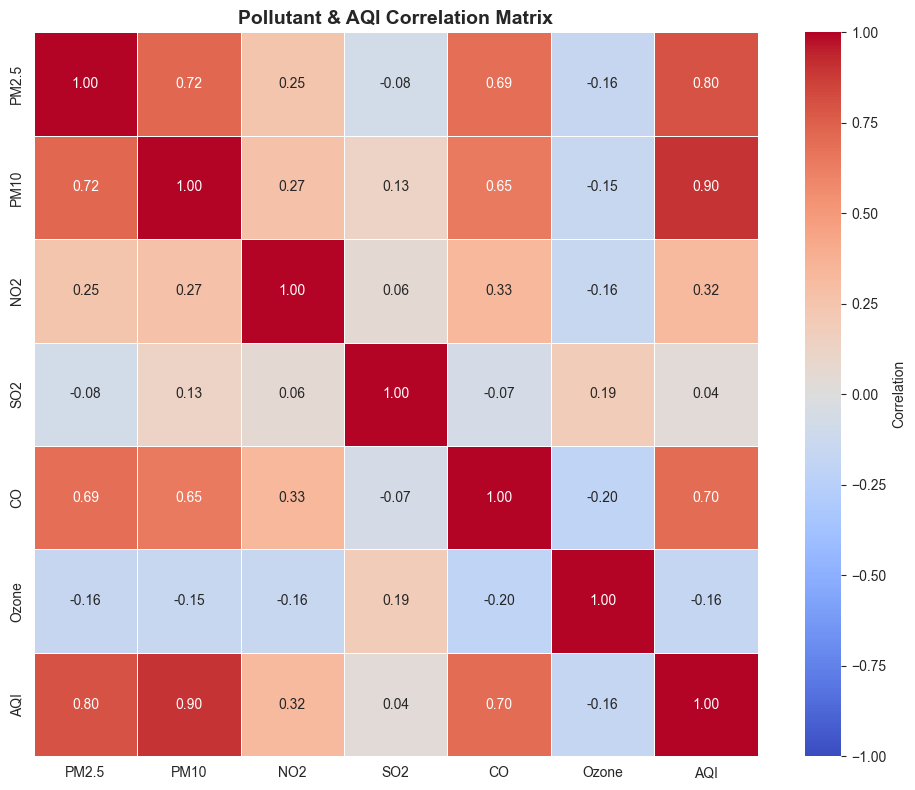

In [26]:
# Correlation heatmap
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm',
            center=0,
            cbar_kws={'label': 'Correlation'},
            vmin=-1, vmax=1,
            square=True,
            linewidths=0.5,
            ax=ax)

ax.set_title('Pollutant & AQI Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 📅 Seasonal Analysis

Season-wise AQI Statistics:
            AQI                         AvgPollution                       \
           mean median     std min  max         mean median    std    min   
Season                                                                      
Autumn   265.65  275.0  111.13  19  489        86.77  83.90  35.53  10.71   
Monsoon  107.57   93.0   57.52  24  353        41.51  37.12  19.85  11.95   
Summer   207.24  206.5   69.37  48  413        70.20  68.06  23.63  25.78   
Winter   282.15  285.0   90.05  41  500        85.95  81.21  32.42  20.16   

                 
            max  
Season           
Autumn   214.32  
Monsoon  251.43  
Summer   158.54  
Winter   212.06  


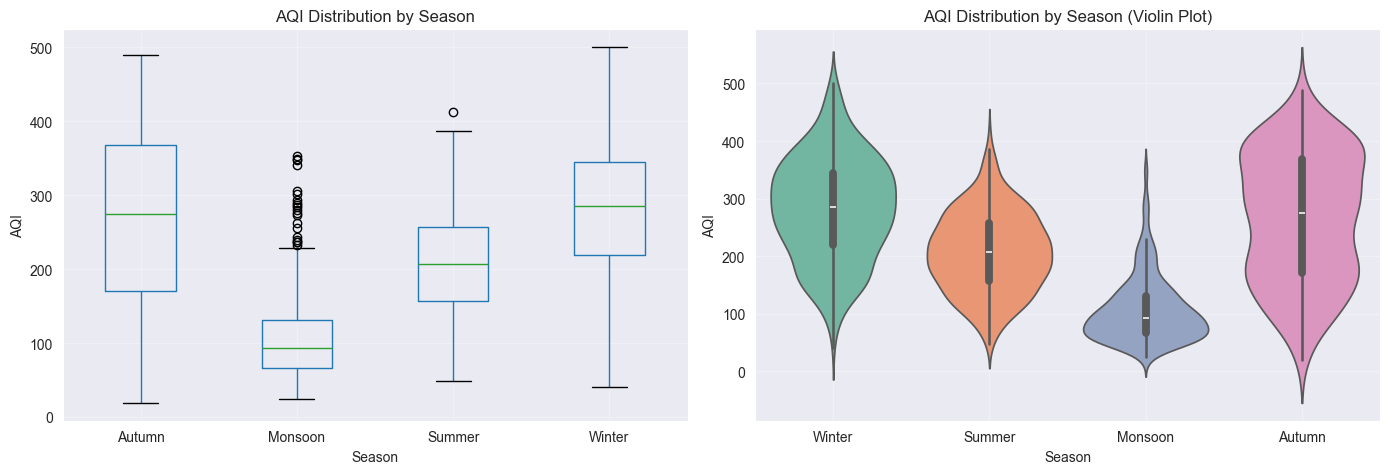

In [27]:
# Season-wise statistics
print("Season-wise AQI Statistics:")
season_stats = df.groupby('Season')[['AQI', 'AvgPollution']].agg(['mean', 'median', 'std', 'min', 'max']).round(2)
print(season_stats)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
df.boxplot(column='AQI', by='Season', ax=axes[0])
axes[0].set_title('AQI Distribution by Season')
axes[0].set_xlabel('Season')
axes[0].set_ylabel('AQI')
axes[0].grid(alpha=0.3)

# Violin plot
sns.violinplot(data=df, x='Season', y='AQI', ax=axes[1], palette='Set2')
axes[1].set_title('AQI Distribution by Season (Violin Plot)')
axes[1].set_ylabel('AQI')
axes[1].grid(alpha=0.3)

plt.suptitle('')
plt.tight_layout()
plt.show()

## 📆 Weekday vs Weekend Comparison

Weekday vs Weekend Analysis:
Weekdays  - Mean: 202.64 | Median: 188.00 | Std: 108.10
Weekends  - Mean: 201.13 | Median: 192.00 | Std: 107.18
Difference: 1.52


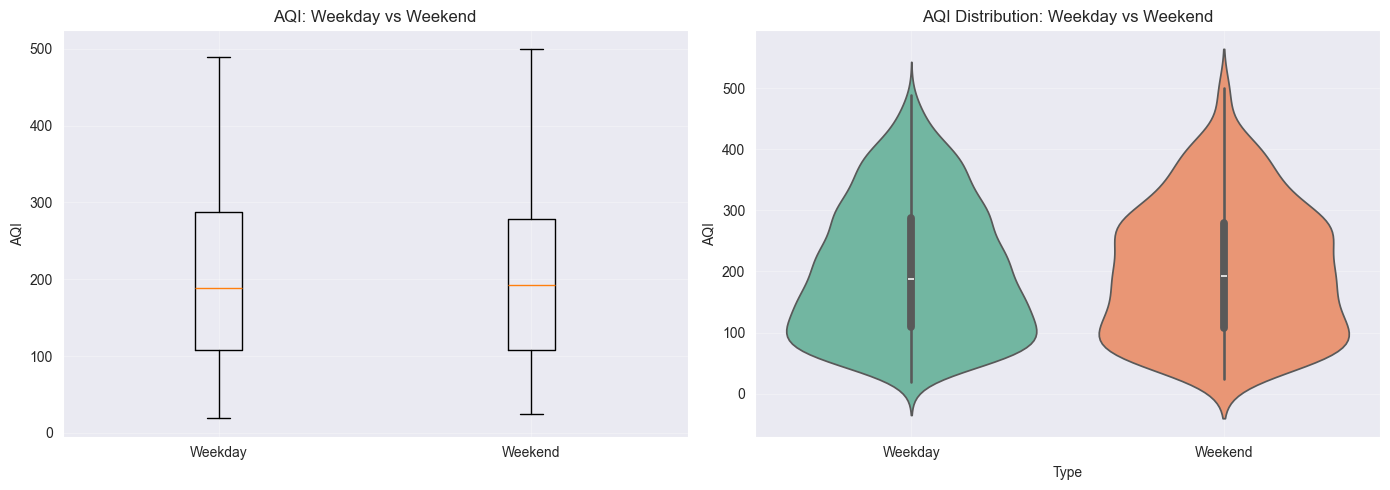

In [28]:
weekday_aqi = df[df['IsWeekend'] == 0]['AQI']
weekend_aqi = df[df['IsWeekend'] == 1]['AQI']

print("Weekday vs Weekend Analysis:")
print(f"Weekdays  - Mean: {weekday_aqi.mean():.2f} | Median: {weekday_aqi.median():.2f} | Std: {weekday_aqi.std():.2f}")
print(f"Weekends  - Mean: {weekend_aqi.mean():.2f} | Median: {weekend_aqi.median():.2f} | Std: {weekend_aqi.std():.2f}")
print(f"Difference: {abs(weekday_aqi.mean() - weekend_aqi.mean()):.2f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

data_to_plot = [weekday_aqi, weekend_aqi]
axes[0].boxplot(data_to_plot, labels=['Weekday', 'Weekend'])
axes[0].set_ylabel('AQI')
axes[0].set_title('AQI: Weekday vs Weekend')
axes[0].grid(alpha=0.3)

data_plot = pd.DataFrame({
    'AQI': pd.concat([weekday_aqi, weekend_aqi]),
    'Type': ['Weekday']*len(weekday_aqi) + ['Weekend']*len(weekend_aqi)
})
sns.violinplot(data=data_plot, x='Type', y='AQI', ax=axes[1], palette='Set2')
axes[1].set_title('AQI Distribution: Weekday vs Weekend')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## ⏱️ Time Series Analysis

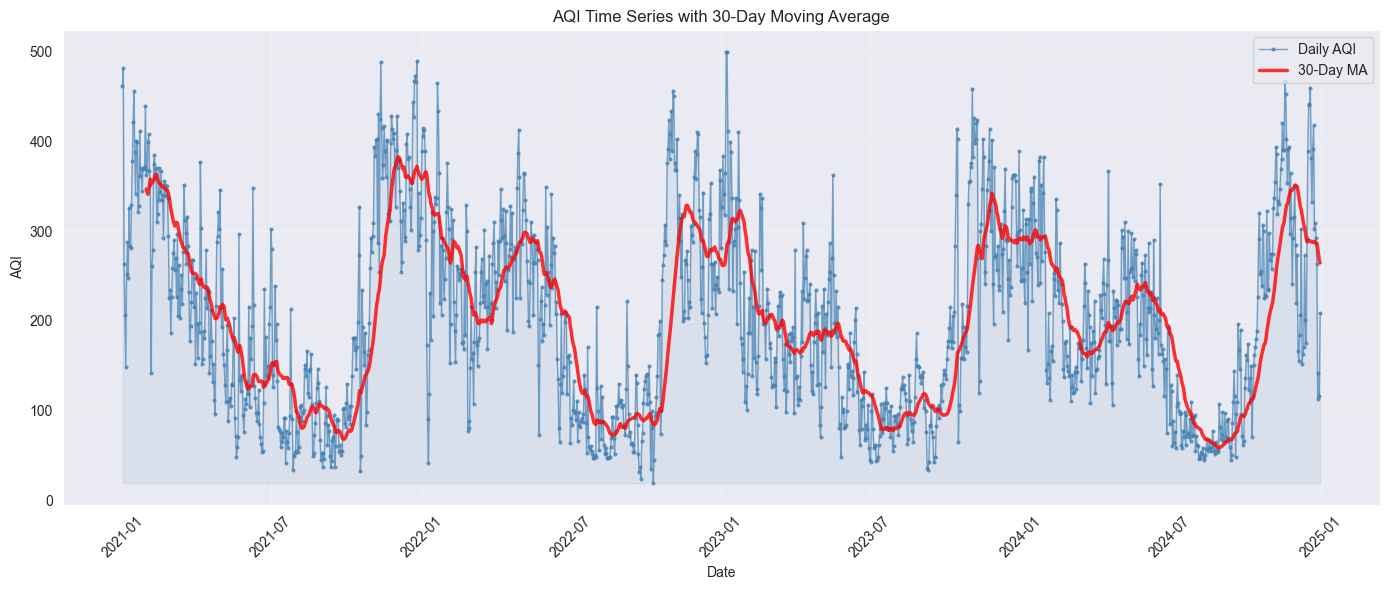

In [29]:
df_sorted = df.sort_values('DateTime')

plt.figure(figsize=(14, 6))
plt.plot(df_sorted['DateTime'], df_sorted['AQI'], marker='o', markersize=2, linewidth=1, color='steelblue', alpha=0.7, label='Daily AQI')

# Add rolling average
rolling_avg = df_sorted['AQI'].rolling(window=30).mean()
plt.plot(df_sorted['DateTime'], rolling_avg, linewidth=2.5, color='red', alpha=0.8, label='30-Day MA')
plt.fill_between(df_sorted['DateTime'], df_sorted['AQI'].min(), df_sorted['AQI'], alpha=0.1, color='steelblue')

plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('AQI Time Series with 30-Day Moving Average')
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🎯 Summary & Key Insights

In [30]:
print("="*70)
print("PROJECT SUMMARY & INSIGHTS")
print("="*70)

print(f"\n📊 Dataset Overview:")
print(f"   - Total records: {len(df)}")
print(f"   - Time span: {df['DateTime'].min().date()} to {df['DateTime'].max().date()}")
print(f"   - Years covered: {df['Year'].nunique()}")
print(f"   - Average AQI: {df['AQI'].mean():.1f}")
print(f"   - Peak AQI: {df['AQI'].max():.1f}")

print(f"\n🌍 Air Quality Findings:")
good_days = (df['AQI_Category'] == 'Good').sum()
poor_days = (df['AQI_Category'].isin(['Poor', 'Very Poor', 'Severe'])).sum()
print(f"   - Good days: {good_days} ({good_days/len(df)*100:.1f}%)")
print(f"   - Poor days: {poor_days} ({poor_days/len(df)*100:.1f}%)")

print(f"\n🔬 Pollutant Insights:")
print(f"   - Most problematic: {df[POLLUTANTS].mean().idxmax()} (Avg: {df[POLLUTANTS].mean().max():.2f})")
print(f"   - Best controlled: {df[POLLUTANTS].mean().idxmin()} (Avg: {df[POLLUTANTS].mean().min():.2f})")

print(f"\n📅 Seasonal Patterns:")
worst_season = df.groupby('Season')['AQI'].mean().idxmax()
best_season = df.groupby('Season')['AQI'].mean().idxmin()
print(f"   - Worst season: {worst_season} (Avg AQI: {df.groupby('Season')['AQI'].mean()[worst_season]:.1f})")
print(f"   - Best season: {best_season} (Avg AQI: {df.groupby('Season')['AQI'].mean()[best_season]:.1f})")

print("\n" + "="*70)

PROJECT SUMMARY & INSIGHTS

📊 Dataset Overview:
   - Total records: 1461
   - Time span: 2021-01-01 to 2024-12-31
   - Years covered: 4
   - Average AQI: 202.2
   - Peak AQI: 500.0

🌍 Air Quality Findings:
   - Good days: 51 (3.5%)
   - Poor days: 680 (46.5%)

🔬 Pollutant Insights:
   - Most problematic: PM10 (Avg: 218.22)
   - Best controlled: CO (Avg: 1.03)

📅 Seasonal Patterns:
   - Worst season: Winter (Avg AQI: 282.1)
   - Best season: Monsoon (Avg AQI: 107.6)

